In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
data = pd.read_csv('train.csv')

In [180]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [182]:
data.shape

(8523, 12)

In [184]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [186]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [188]:
# univariate imputation 

from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
data['Item_Weight_mean'] = mean_imputer.fit_transform(data[['Item_Weight']])

median_imputer = SimpleImputer(strategy='median')
data['Item_Weight_median'] = median_imputer.fit_transform(data[['Item_Weight']])

data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

data = data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median'], axis=1)




In [190]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [192]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [194]:
data = data.drop('Outlet_Size', axis=1)

In [196]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [198]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
      dtype=object)]
[array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [200]:
data_encoded.head(3)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,156.0,1.0,0.016047,4.0,249.8092,9.0,1999,0.0,1.0,3735.1380,9.30
1,8.0,2.0,0.019278,14.0,48.2692,3.0,2009,2.0,2.0,443.4228,5.92
2,662.0,1.0,0.016760,10.0,141.6180,9.0,1999,0.0,1.0,2097.2700,17.50


In [202]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [204]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,8.93


0.5539681757715055


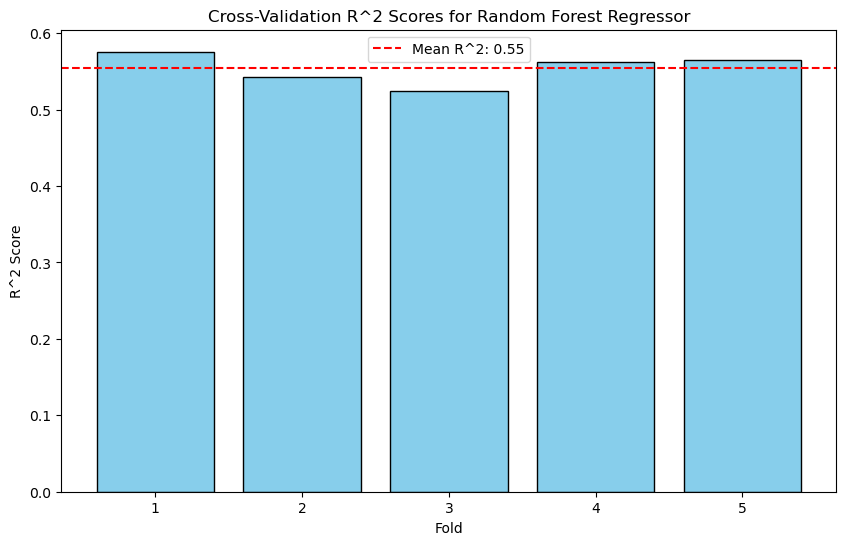

In [206]:
# implementingn random forest regresssion i
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Mean R^2: {scores.mean():.2f}')
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation R^2 Scores for Random Forest Regressor')
plt.xticks(range(1, len(scores) + 1))
plt.legend()
plt.show()


In [208]:
final_data = X.drop(columns=["Item_Visibility","Item_Identifier","Item_Fat_Content","Item_Type",],axis=1)

In [210]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate
0,249.8092,9.0,1999,0.0,1.0,9.300
1,48.2692,3.0,2009,2.0,2.0,5.920
2,141.6180,9.0,1999,0.0,1.0,17.500
3,182.0950,0.0,1998,2.0,0.0,19.200
4,53.8614,1.0,1987,2.0,1.0,8.930
...,...,...,...,...,...,...
8518,214.5218,1.0,1987,2.0,1.0,6.865
8519,108.1570,7.0,2002,1.0,1.0,8.380
8520,85.1224,6.0,2004,1.0,1.0,10.600
8521,103.1332,3.0,2009,2.0,2.0,7.210


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(final_data,y,test_size=0.20,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [220]:
y_pred = rf.predict(X_test)
mean_absolute_error(y_test,y_pred)


791.4566253442814

In [226]:
import warnings
warnings.filterwarnings('ignore')

pred = rf.predict(np.array([[142.5180,9.0,2.0,2.0,1.0,24]]))[0]

lower_bound = pred - 791.456
upper_bound = pred + 791.456
print(f"Sales Value is between {lower_bound} and {upper_bound}")

Sales Value is between 1622.5417180000018 and 3205.453718000002
